### Obesity logistic regression training model

ok load the libraries and set your working directory

In [241]:
library(tidyverse)
library(mosaic)
library(broom)

In [242]:
#setwd('/media//jochum00/Aagaard_Raid3/michael_files/Rani_Perasani/kaggle_project/')

ok lets import the training datasets

In [243]:
train_part<-as_tibble(read.csv("data/train_participant_data(trainset).csv",header = T,sep = ","))# A tibble: 114 x 21
train_walk<-as_tibble(read.csv("data/train_walking_data(trainset).csv",header = T,sep = ","))# A tibble: 114 x 21

load the testing libraries

In [244]:
test_part<-as_tibble(read.csv("data/test_participant_data(testset).csv",header = T,sep = ","))# A tibble: 114 x 21
test_walk<-as_tibble(read.csv("data/test_walking_data(testset).csv",header = T,sep = ","))# A tibble: 114 x 21

fix the walking datasets by concatenating the id column

In [245]:
#merge the two datasets
#train<-merge(train_part,train_walk,by = "id")
#merge the two testing dataset
#test<-merge(test_part,test_walk,by = "id")

In [246]:
###########
#filler code, delete this later
###########
train<-train_part
test<-test_part
train$BMI_level
colnames(train)

[1] 2 2 4 3 3 2 3 3 2 2 2 2 1 2 2 2 2 2 2 2 3 2 4 3 2 4 2 4 3 2 2 2 2 2 2 2 3
 [38] 2 2 3 2 4 4 4 2 3 2 3 2 2 3 3 2 2 2 4 2 2 4 2 2 2 2 3 2 4 2 3 2 2 2 2 2 2
 [75] 1 2 3 4 3 2 2 2 2 2 2 2 2 3 4 4 2 2 2 2 4 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3
[112] 3 3 2

[1] "id"           "date"         "pain"         "medication"   "walking"     
 [6] "tbi"          "six_months"   "multiple_tbi" "gender"       "asian"       
[11] "black"        "white"        "other"        "hispanic"     "weight"      
[16] "height"       "start_time"   "stop_time"    "valid"        "BMI_level"   
[21] "Obese"

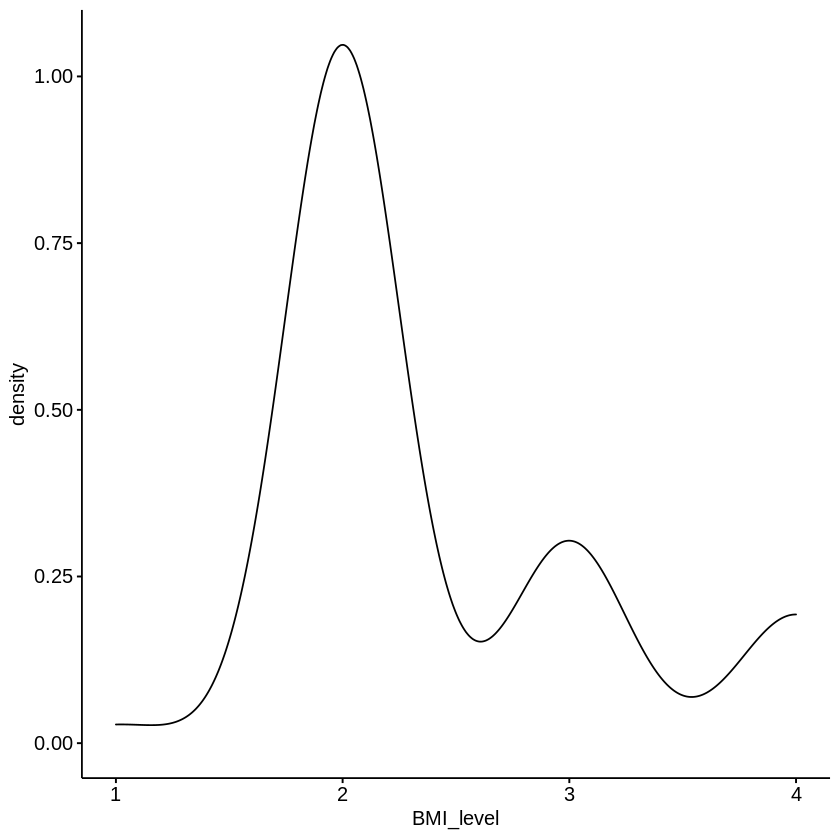

In [247]:
library(ggpubr)
ggdensity(data=train,x = "BMI_level",color ="Obese",fill="Obese")

ok lets start by cleaning up the data a bit

- First lets fix these date time formats

In [248]:
train$date<-as.Date(train$date,tryFormats = "%m/%d/%Y %H:%M")
test$date<-as.Date(test$date,tryFormats = "%m/%d/%Y %H:%M")

In [249]:
# # good now lets merge the race columns
# race<-train%>%
#   select(c(id,asian,black,white,other,hispanic))%>%
#   pivot_longer(cols = c(asian,black,white,other,hispanic),names_to="race")%>%
#   filter(value==TRUE)%>%
#   group_by(id,race)

In [250]:
# ok lets split our training data into 80:20 for testing
#train<-train
#train<-head(train,91L)
#test<-tail(train,23L)

### logistic regression model (parallel slopes)

maybe lets try building the obesity model based on BMI score because it has higher resolution than 1 or 0 for obese

In [251]:
mod_glm<- glm(formula = BMI_level ~ id+
                date+
                pain+
                medication+
                walking+
                tbi+
                six_months+
                multiple_tbi+
                gender+ 
                asian+
                black+
                white+
                other+
                hispanic+
                # weight+
                #  height+
                valid,family = gaussian,
              data = train)

logistic regression (interaction slopes)

In [252]:
mod_glm_inter<- glm(formula = BMI_level ~ id+
                   id*date+
                  id*pain+
                  id*medication+
                  id*walking+
                  id*tbi+
                  id*six_months+
                  id*multiple_tbi+
                 id*gender*asian*black*white*other*hispanic+
                 # weight+
                 #  height+
                  valid,family = gaussian,
                data = train)

 ok lets get a summary of our model

In [253]:
msummary(mod_glm)
msummary(mod_glm_inter)

Coefficients: (5 not defined because of singularities)
                   Estimate Std. Error t value Pr(>|t|)   
(Intercept)       1.898e+02  6.361e+02   0.298  0.76598   
id               -7.342e-04  2.184e-03  -0.336  0.73739   
date             -1.033e-02  3.496e-02  -0.295  0.76827   

(Dispersion parameter for gaussian family taken to be 0.5168771)

    Null deviance: 59.789  on 113  degrees of freedom
Residual deviance: 53.238  on 103  degrees of freedom
AIC: 260.72

Number of Fisher Scoring iterations: 2

Coefficients: (121 not defined because of singularities)
                                                                     Estimate
(Intercept)                                                         2.593e+03
id                                                                 -1.763e+01
date                                                               -1.422e-01

(Dispersion parameter for gaussian family taken to be 0.521774)

    Null deviance: 59.789  on 113  degrees of freedom
Residual deviance: 48.003  on  92  degrees of freedom
AIC: 270.92

Number of Fisher Scoring iterations: 2

In [254]:
##################################################################################
# I commented lines 111 to 131 out to save time, 
#but you should uncomment them out when you run the model to get the results
#############################################################################

In [255]:
#get the odds ratio
# OR<-tidy(mod_glm, conf.int=T,exponentiate = T)
# #OR

In [256]:
# #get the analysis of variance

In [257]:
# mod_glm_aov<-anova(mod_glm)
# #mod_glm_aov

In [258]:
# #get the coefficients
# mod_glm_coef<-coef(mod_glm)
# #mod_glm_coef

In [259]:
# #get the 95% confidence intervals
# mod_glm_confint<-confint(mod_glm)
# #mod_glm_confint

In [260]:
# #get the r squared vaslus
# mod_glm_rqsuared<-rsquared(mod_glm)
# #mod_glm_rqsuared

In [261]:
# #Diagnostics; plot residuals

In [262]:
# gf_dhistogram(~resid(mod_glm))
# gf_qq(~resid(mod_glm))

In [263]:
# #Diagnostics; plot residuals vs. fitted

In [264]:
# gf_point(resid(mod_glm) ~fitted(mod_glm))

In [268]:
#make a function based on the model
mod_glm_fun <- makeFun(mod_glm)
mod_glm_inter_fun <- makeFun(mod_glm_inter)

In [269]:
# predict based on training data 
#(bad, this can cause overfitting,the right answer is to cut out 20% from the model 
# build and run it as test)
train$BMI_glm_pred<-mod_glm_fun(id = train$id,
                                     date = train$date,
                                     pain = train$pain,
                                     medication = train$medication,
                                     walking = train$walking,
                                     tbi = train$tbi,
                                     six_months = train$six_months,
                                     multiple_tbi = train$multiple_tbi,
                                     gender = train$gender,
                                     asian = train$asian,
                                     black = train$black,
                                     white = train$white,
                                     other = train$other,
                                     hispanic = train$hispanic,
                                  #   weight = NULL,
                                  #   height = NULL,
                                     valid = train$valid)
train$BMI_glm_pred<-mod_glm_inter_fun(id = train$id,
                                     date = train$date,
                                     pain = train$pain,
                                     medication = train$medication,
                                     walking = train$walking,
                                     tbi = train$tbi,
                                     six_months = train$six_months,
                                     multiple_tbi = train$multiple_tbi,
                                     gender = train$gender,
                                     asian = train$asian,
                                     black = train$black,
                                     white = train$white,
                                     other = train$other,
                                     hispanic = train$hispanic,
                                  #   weight = NULL,
                                  #   height = NULL,
                                     valid = train$valid)

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


In [267]:
#predict based on test data

In [270]:
test$BMI_glm_pred<-mod_glm_fun(id = test$id,
                                    date = test$date,
                                    pain = test$pain,
                                    medication = test$medication,
                                    walking = test$walking,
                                    tbi = test$tbi,
                                    six_months = test$six_months,
                                    multiple_tbi = test$multiple_tbi,
                                    gender = test$gender,
                                    asian = test$asian,
                                    black = test$black,
                                    white = test$white,
                                    other = test$other,
                                    hispanic = test$hispanic,
                                    #   weight = NULL,
                                    #   height = NULL,
                                    valid = test$valid)
test$BMI_glm_pred<-mod_glm_inter_fun(id = test$id,
                                    date = test$date,
                                    pain = test$pain,
                                    medication = test$medication,
                                    walking = test$walking,
                                    tbi = test$tbi,
                                    six_months = test$six_months,
                                    multiple_tbi = test$multiple_tbi,
                                    gender = test$gender,
                                    asian = test$asian,
                                    black = test$black,
                                    white = test$white,
                                    other = test$other,
                                    hispanic = test$hispanic,
                                    #   weight = NULL,
                                    #   height = NULL,
                                    valid = test$valid)

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


### Model evaluation

convert the results from a double to an interger by rounding

In [271]:
#train$BMI_glm_pred<-round(train$BMI_glm_pred,digits = 0, )
#test$BMI_glm_pred<-round(test$BMI_glm_pred,digits = 0)

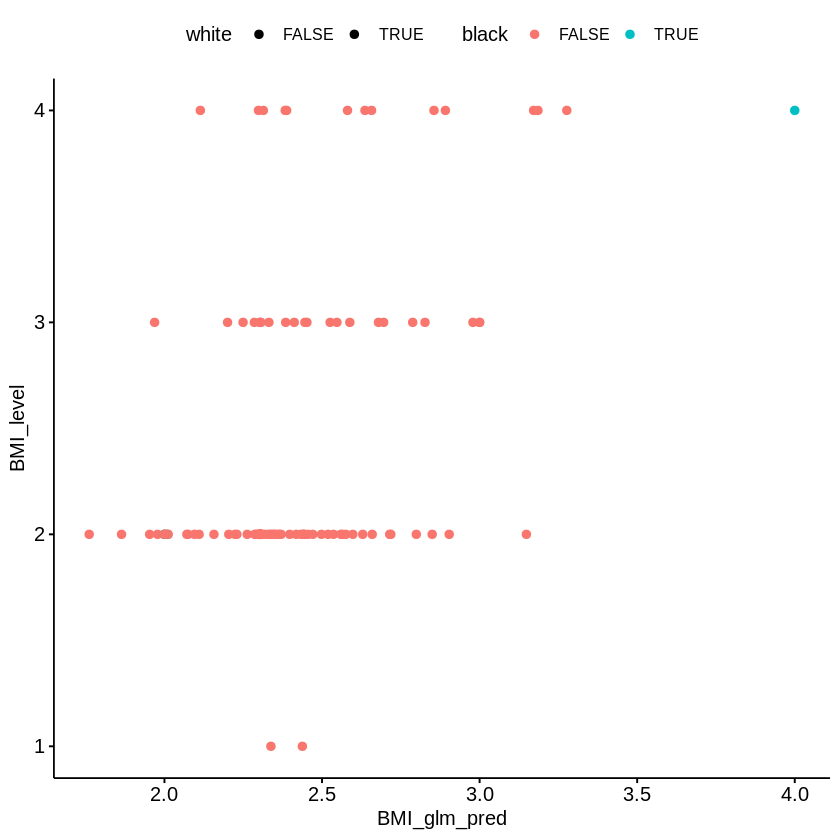

In [272]:
ggscatter(data = train,x = "BMI_glm_pred",y = "BMI_level")


make an "obese prediction column that cuts off the TRUE/False at a specific cutoff

In [304]:
train$BMI_glm_predObese<-train$BMI_glm_pred<2.6
test$BMI_glm_predObese<-test$BMI_glm_pred<2.6

bind the columns id and glm predicted into a df called res as results

In [306]:
res<-cbind(test$id,test$BMI_glm_pred,test$BMI_glm_predObese)
# train_res<-cbind(train$id,train$Obese,train$Obese_pred)
write.table(train_res,"train_res.tsv",row.names = F,sep = "\t")
write.table(res,"res.tsv",row.names = F,sep = "\t")

convert to a tibble

I found out by looking at the results that we should cut off at BMI>2.6 instead of justrounding....lets try it out!

In [132]:
#train_wrong<-filter(`.data` = train,id>83)
#cbind(train_wrong$id,train_wrong$BMI_level,train_wrong$BMI_glm_pred)

In [275]:
res<-as_tibble(res)
head(res)

V1,V2
<dbl>,<dbl>
1,2.29831179
2,2.29836458
3,2.54372077
4,1.74509180
5,2.97456887
6,-0.06265841


In [287]:
#adding the column
#warning: this calum if called obese, but its really the 
#BMI score and needs to be converted into a 1 or a 0
#colnames(res)<-c("id","Obese")
#red<-filter(`Obese` = train,id>83)

In [288]:
write.table(res,"res.tsv",sep = "\t",quote = F,row.names = F)

In [292]:
#figure out if this model was correct or not based on the trainin data (again.... not great)
test$BMI_glm_pred

1            2            3            4            5            6 
 2.298311785  2.298364578  2.543720774  1.745091801  2.974568866 -0.062658408 
           7            8            9           10           11           12 
 1.958901559  3.073574177  0.007658414  2.676486412  3.057136751  2.529245244 
          13           14           15           16           17           18 
 1.780403685  2.526028460  0.148292057  1.792174313  2.670110950  3.018782757 
          19           20           21           22           23           24 
 3.013303615  1.807868484  2.666467829  2.513161322  2.299473230  5.300538414 
          25           26           27           28           29           30 
 6.031582606  2.506727753  1.835333283  2.503510969  2.299789987  2.299842780 
          31           32           33           34           35           36 
 2.299895573  2.942074770  1.858874538  1.862798081  1.866721624  2.920158202 
          37           38           39           40           41           42 
 0.049482019  7.383726801  2.300317917  7.718283483  1.890262880  2.887283350 
          43           44           45           46           47           48 
 1.898109965  1.248414561  2.870845924  2.771567309  1.913804136  2.854408499 
          49           50           51           52           53           54 
 2.469734732  2.468126339  2.466517947  2.832491931  1.937345392  2.419332184 
          55           56 
 2.816054505  2.301215396

In [293]:
train$glmdiff<-train$BMI_glm_pred==train$BMI_level

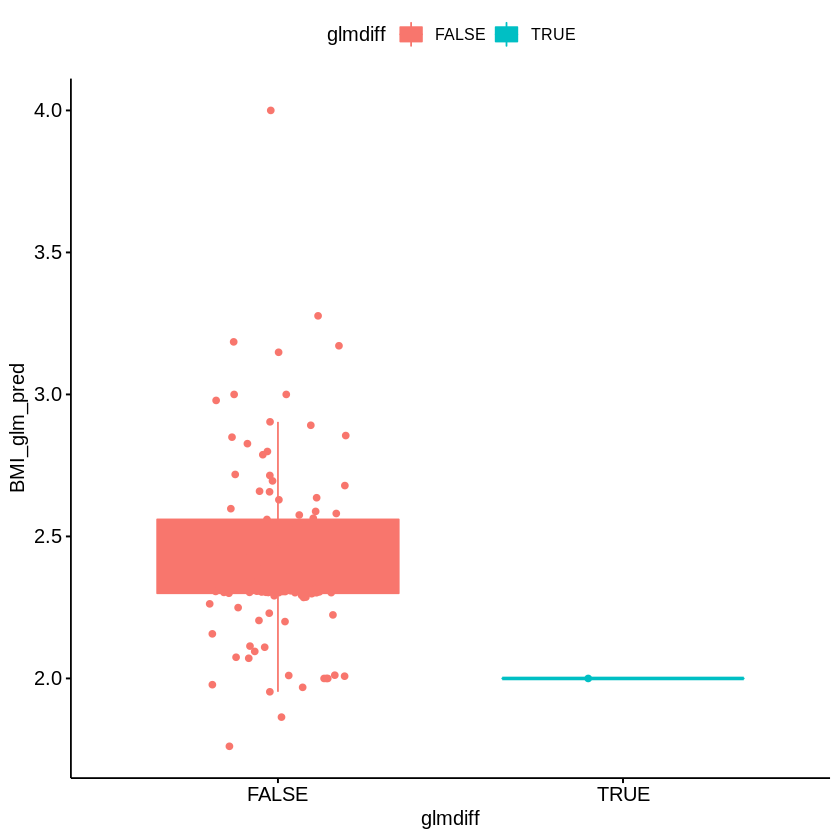

In [294]:
library(ggpubr)
ggboxplot(data = train,x = "glmdiff",y = "BMI_glm_pred",add="jitter",color="glmdiff",fill="glmdiff")

In [295]:
tally(~train$glmdiff)
tally(~train$glmdiff,format = "percent")

train$glmdiff
 TRUE FALSE 
    1   113 

train$glmdiff
     TRUE     FALSE 
 0.877193 99.122807 

In [296]:
#export the training data to a tsv file

In [297]:
write.table(train,"train.tsv",sep = "\t",quote = F,row.names = F)

In [298]:
#make a ggplot 2 scatter plot that shows that actual versus predicted with the training model

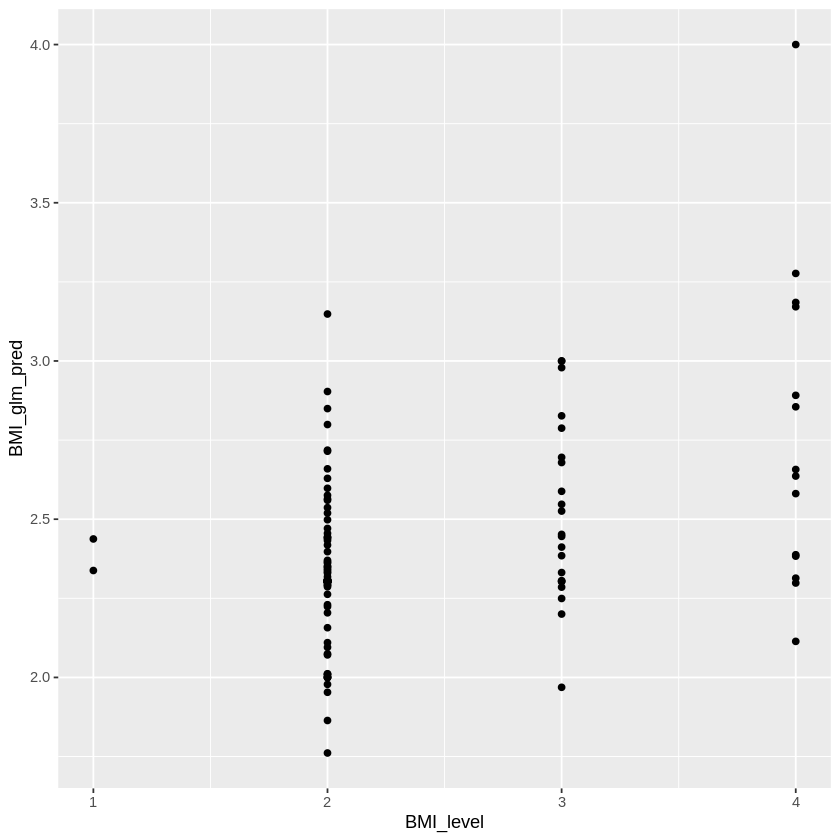

In [299]:
scatter<-ggplot(train)+geom_point(mapping = aes(x = BMI_level, y=BMI_glm_pred))
scatter

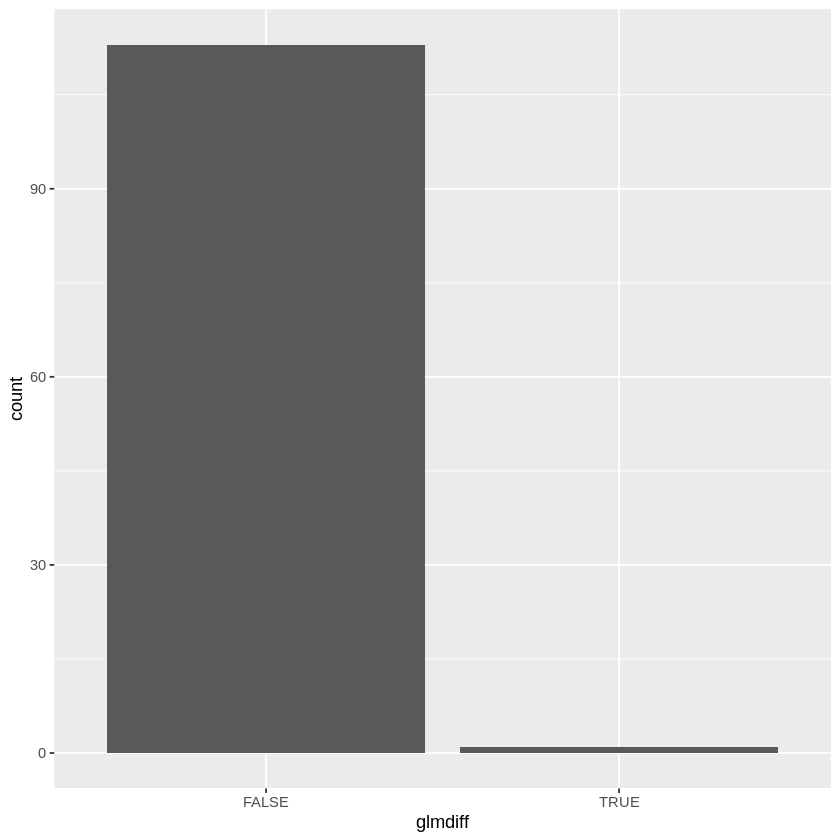

In [300]:
bar<-ggplot(train)+geom_bar(mapping = aes(x = glmdiff))
bar

In [78]:
#how to improve this model

#instead of convert the results from a double to an interger by rounding up or down

#incorporate the start and stop times in difference by converting to seconds and then building it into the model

#incorporate the interaction slopes into the model

#look at the differences with the things that were close to being bmi4 but not bmi4



#add the walking data to the analysis portion


# good now lets merge the race columns